# Image Retrieval

In [23]:
%matplotlib inline
%matplotlib notebook
%load_ext autoreload
%autoreload 2
from download import main
from glob import glob
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

import os.path as osp

from utils import *
import src as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_path = osp.join('..','data')
categories = ['boy', 'cat', 'car', 'dog', 'girl']
interested_frames = ['start', 'middle', 'quater3']
limit_each_category = -1
vocab_size = 200
vocab_prefix = 'vocab.pkl'

# load image paths
category_paths = get_image_directories(data_path, categories)
image_paths, image_labels = load_images_paths(limit_each_category, category_paths)
X_train, X_test, y_train, y_test = train_test_split(image_paths, image_labels, test_size=0.2, random_state=42)

../data/boy/100021.gif
(364, 250)


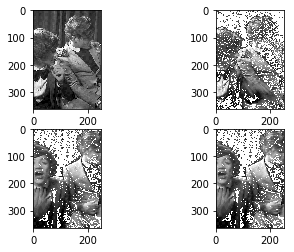

In [4]:
print(image_paths[1])
im1 = load_gif_gray(image_paths[6], frame='start')
im2 = load_gif_gray(image_paths[6], frame='quater')
im3 = load_gif_gray(image_paths[6], frame='midde')
im4 = load_gif_gray(image_paths[6], frame='end')

print(im1.shape)

plt.subplots(2,2)
plt.subplot(2, 2, 1)
plt.imshow(im1, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(im2, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(im3, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(im4, cmap='gray')

In [29]:
all_imgs = []
for path in image_paths:
    try:
        imgs = load_gif_gray(path)
        all_imgs.append(imgs)
    except TypeError:
        print(path)
        pass

../data/boy/15965.gif
../data/cat/24745.gif
../data/cat/38884.gif
../data/car/57632.gif
../data/car/58187.gif
../data/car/89949.gif
../data/girl/101385.gif
../data/girl/2865.gif
../data/girl/65478.gif
../data/girl/71232.gif
../data/girl/97095.gif


OSError: [Errno 22] Invalid argument

[[<PIL.Image.Image image mode=L size=400x134 at 0x1A20B0B320>, <PIL.Image.Image image mode=L size=400x134 at 0x1A20B0B358>, <PIL.Image.Image image mode=L size=400x134 at 0x1A20B0B240>, <PIL.Image.Image image mode=L size=400x134 at 0x1A20B0B438>, <PIL.Image.Image image mode=L size=400x134 at 0x1A20B0B4A8>], [<PIL.Image.Image image mode=L size=500x230 at 0x1A20B0B588>, <PIL.Image.Image image mode=L size=500x230 at 0x1A20B0B2E8>, <PIL.Image.Image image mode=L size=500x230 at 0x1A20B0B550>, <PIL.Image.Image image mode=L size=500x230 at 0x1A20B0B5C0>, <PIL.Image.Image image mode=L size=500x230 at 0x1A20B0B668>], [<PIL.Image.Image image mode=L size=500x208 at 0x1A20B0B5F8>, <PIL.Image.Image image mode=L size=500x208 at 0x1A20B0B748>, <PIL.Image.Image image mode=L size=500x208 at 0x1A20B0B470>, <PIL.Image.Image image mode=L size=500x208 at 0x1A20B0B630>, <PIL.Image.Image image mode=L size=500x208 at 0x1A20B0B780>], [<PIL.Image.Image image mode=L size=245x169 at 0x1A20B0B6A0>, <PIL.Image.Image

In [40]:
with open('all_imgs1.pkl', 'wb') as f:
    pickle.dump(all_imgs, f)

OSError: [Errno 22] Invalid argument

## build visual vocabulary

In [ ]:
vocab_filename = str(vocab_size) + vocab_prefix
if not osp.exists(vocab_filename):
    vocab = sc.build_vocabulary(X_train, vocab_size)
    with open(vocab_filename, 'wb') as f:
      pickle.dump(vocab, f)
      print('{:s} saved'.format(vocab_filename))

In [5]:
vocab_filename = str(vocab_size) + vocab_prefix

train_feats = np.empty((len(X_train), 0))
test_feats = np.empty((len(X_test), 0))

for frame in interested_frames:
    train_extracted = sc.get_bags_of_sifts(X_train, vocab_filename, frame)
    test_extracted = sc.get_bags_of_sifts(X_test, vocab_filename, frame)
    
    train_feats = np.concatenate((train_feats, train_extracted), axis=1)
    test_feats = np.concatenate((test_feats, test_extracted), axis=1)

In [8]:
predicted_indexes = sc.nearest_neighbor_classify(train_feats, test_feats)

In [9]:
acc = np.array(y_train)[predicted_indexes[:, 0].T] == np.array(y_test)
acc = np.mean(acc.astype(int))
print(acc)

0.3726074011059124


# Classification with linear SVM

In [10]:
print('Using SVM classifier to predict test set categories')
predicted_categories, svms = sc.svm_classify(train_feats, y_train, train_feats, SVM_lambda=1000)

Using SVM classifier to predict test set categories


/Users/pagepeng/miniconda3/envs/gif_retrieval/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/pagepeng/miniconda3/envs/gif_retrieval/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/pagepeng/miniconda3/envs/gif_retrieval/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/pagepeng/miniconda3/envs/gif_retrieval/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/pagepeng/miniconda3/envs/gif_retrieval/lib/python3.5/

[[0.33158532 0.08430819 0.03307785 0.26865672 0.28237192]
 [0.0607763  0.53217569 0.02196118 0.30643514 0.07865169]
 [0.06566105 0.06566105 0.55102041 0.22981366 0.08784383]
 [0.06913997 0.20236088 0.03456998 0.62394604 0.06998314]
 [0.1075066  0.06639004 0.02489627 0.19200302 0.60920407]]


<IPython.core.display.Javascript object>


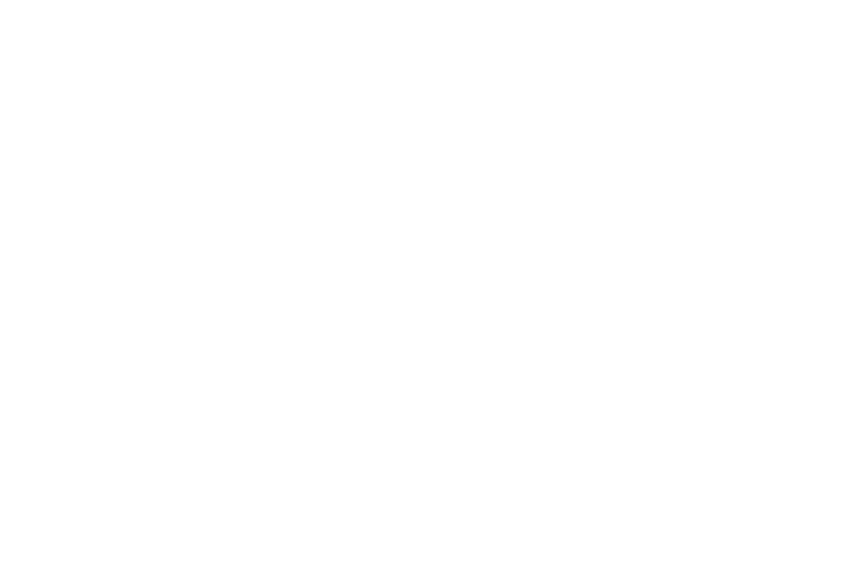

<IPython.core.display.Javascript object>


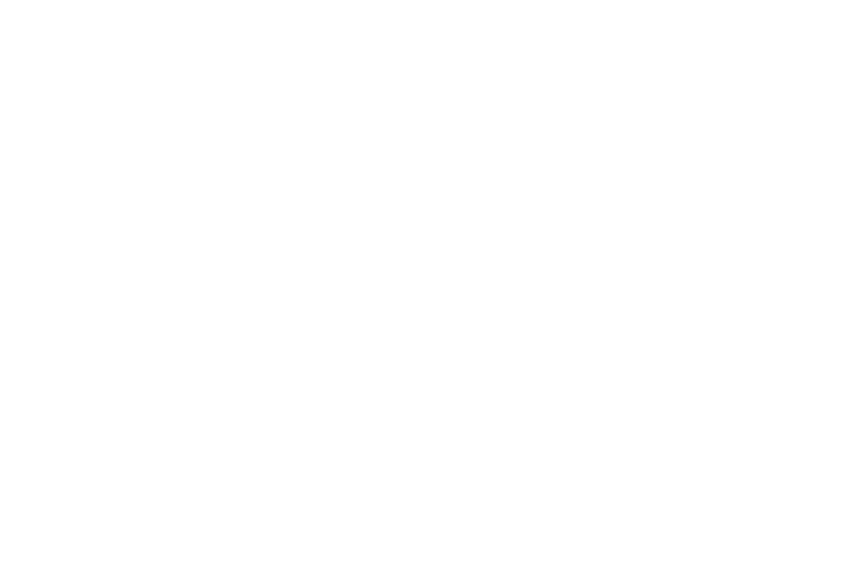

In [39]:
show_results(X_train, X_train, y_train, y_train, categories, categories,
             predicted_categories)

In [20]:
weights = np.zeros((1, 600))
for category, svm in svms.items():
    print(svm.coef_)

[[-4.69447093e+00 -3.13755878e+00  1.85189044e+00 -4.42526712e+00
   4.02417935e-01  1.59190212e+00 -3.39534930e-01  1.11735033e+00
  -1.64741590e+00 -2.18046052e-01 -5.95004345e+00 -1.81835358e+00
   2.86811417e+00 -1.90797133e+00 -1.38392053e+00  3.38745796e+00
   5.36118589e+00 -3.18945637e+00  4.48272062e+00  7.93360485e-02
   5.48995637e+00 -6.06852119e+00  2.33953870e+00  7.40970288e-01
   9.73729396e-01  3.40714252e+00 -2.38960771e+00  3.75435074e+00
   3.32557561e+00 -1.20421713e+01 -4.35995024e-01  3.99490987e+00
  -5.04562487e+00  1.15720129e+00  4.36497908e+00 -3.49555981e+00
   3.88829278e+00  5.96626064e-01 -7.54748221e+00 -2.27468835e+00
   1.32960958e+00  3.80380548e+00  1.54570662e+00 -2.66145864e+00
   1.35733640e+00 -2.91701014e-01 -3.06319691e+00 -7.72020998e+00
   2.94996856e+00 -4.68305958e+00 -3.22251126e+00  1.88887002e-01
   9.16928226e-02  3.62028828e+00  4.81357145e+00 -7.09201134e+00
   4.52914636e+00 -5.08569448e+00  2.82957007e+00 -2.66192070e+00
  -3.66829

In [ ]:
train_feats = train_feats / weights
test_feats = test_feats / weights

In [ ]:
print(train_feats.shape)
print(predicted_indexes.shape)